In [1]:
# Ultimate data science take home challenge
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_json(r'C:\Users\Fernando Araiza\Downloads\1631809090_1481053515_ultimate_challenge_3_\ultimate_challenge\logins.json')
data



,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [3]:
data.set_index('login_time', inplace = True)



In [4]:
data['counted'] = 1

In [5]:
df = data.resample("15T").agg({'counted': "sum"})
df

,counted
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [6]:
df.describe()

,counted
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [7]:
max_log = df.query('counted == 73')
max_log

,counted
login_time,
1970-03-01 04:30:00,73


In [8]:
min_log = df.query('counted == 0').sort_index()
min_log

,counted
login_time,
1970-01-01 21:30:00,0
1970-01-02 04:15:00,0
1970-01-02 06:15:00,0
1970-01-02 18:00:00,0
1970-01-03 08:45:00,0
...,...
1970-04-11 08:45:00,0
1970-04-13 05:30:00,0
1970-04-13 06:00:00,0


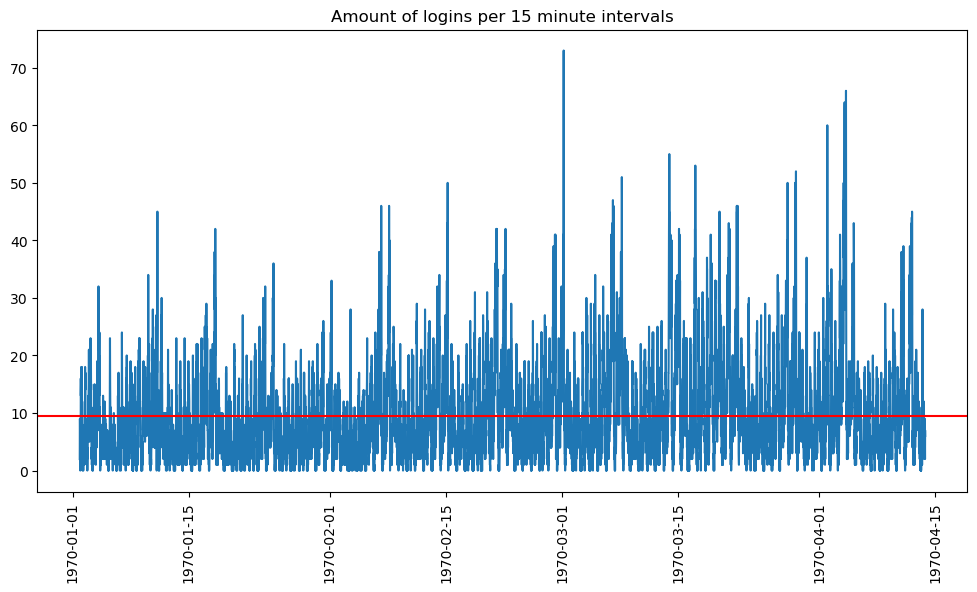

In [9]:
plt.figure(figsize= (12,6))
plt.plot(df)

plt.xticks(rotation = 'vertical')
plt.axhline(y = 9.515938 , color =  'r', linestyle = '-')
plt.title("Amount of logins per 15 minute intervals")

plt.show()

In [10]:
df_counts = df.value_counts().rename_axis('login_amount').to_frame('frequency')

In [11]:
df_counts

,frequency
login_amount,
2,726
4,706
3,703
5,658
1,638
...,...
56,1
63,1
64,1


Text(0, 0.5, 'Frequency of amount')

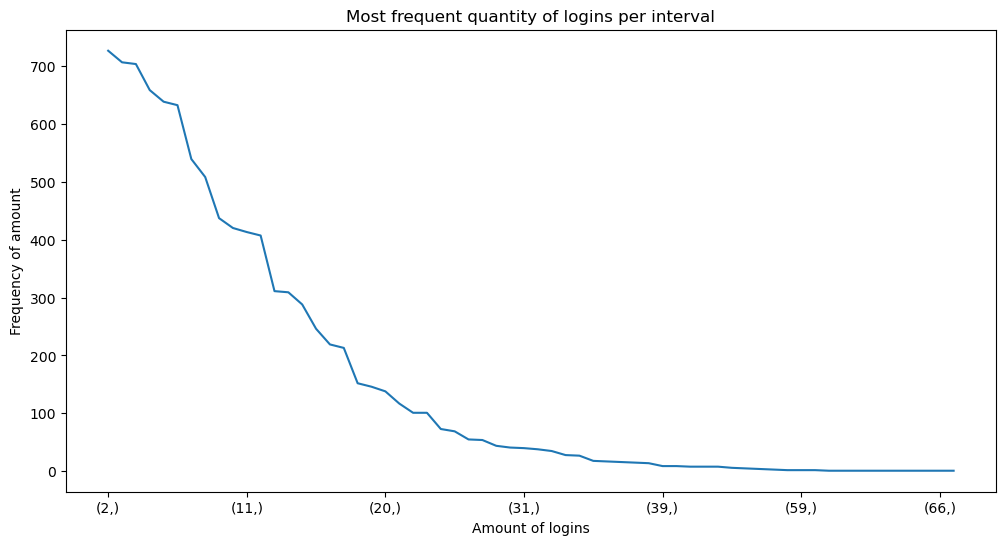

In [12]:
plt.figure(figsize= (12,6))
df_counts.frequency.plot()
plt.title('Most frequent quantity of logins per interval')
plt.xlabel('Amount of logins')
plt.ylabel('Frequency of amount')


In [13]:
# Return timestap to column
df2 = df.reset_index()


In [14]:
df2

,login_time,counted
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7


In [15]:
df_grouped = df2.groupby(df2['login_time'].dt.time).counted.sum()

In [16]:
df_grouped = df_grouped.reset_index().rename(columns = {'login_time': 'interval', 'counted' : 'total_logins'})

In [17]:
df_grouped.describe()

,total_logins
count,96.000000
mean,970.229167
std,455.485640
min,175.000000
25%,690.750000
50%,899.500000
75%,1404.000000
max,1684.000000


In [18]:
df_grouped.info()
df_grouped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   interval      96 non-null     object
 1   total_logins  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


,interval,total_logins
0,00:00:00,1439
1,00:15:00,1547
2,00:30:00,1525
3,00:45:00,1482
4,01:00:00,1549
...,...,...
91,22:45:00,1637
92,23:00:00,1573
93,23:15:00,1552
94,23:30:00,1456


<AxesSubplot:xlabel='interval'>

<Figure size 1000x1200 with 0 Axes>

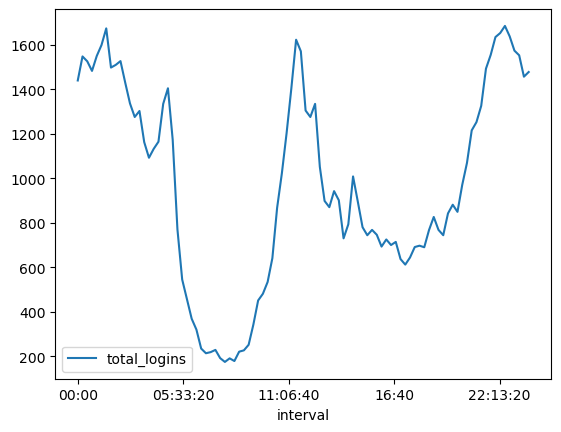

In [19]:
plt.figure(figsize= (10, 12))
df_grouped.plot(x = 'interval', y = 'total_logins')

In [20]:
top_75 = df_grouped.query('total_logins > 1404').sort_index()

<AxesSubplot:title={'center':'Intervals in top 25 percentile'}, xlabel='interval'>

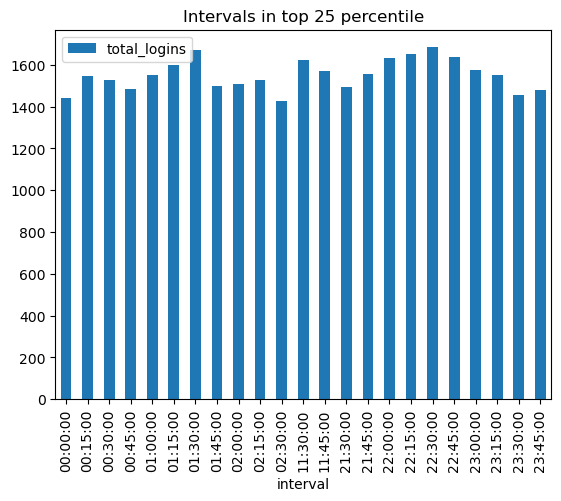

In [21]:
top_75.plot(kind = 'bar', x = 'interval', y = 'total_logins', title = 'Intervals in top 25 percentile')

In [22]:
bottom_25 = df_grouped.query('total_logins < 690.75').sort_index()

<AxesSubplot:title={'center':'Intervals in bottom 25 percentile'}, xlabel='interval'>

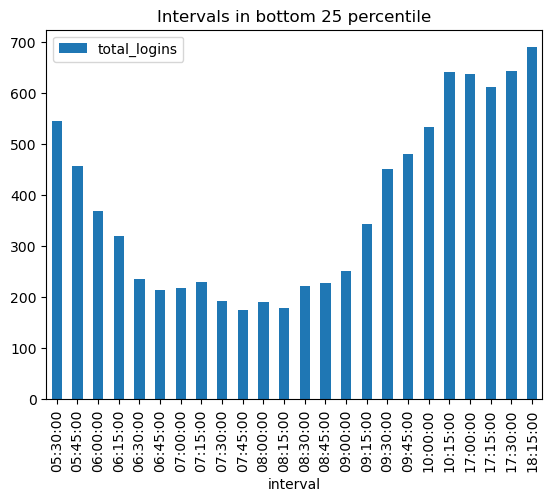

In [23]:
bottom_25.plot(kind = 'bar', x = 'interval', y = 'total_logins', title = 'Intervals in bottom 25 percentile')

In [24]:
print('Based on the data, it seems that the app is used most in late night situations and for lunch. It is used least for commute to and from work')

Based on the data, it seems that the app is used most in late night situations and for lunch. It is used least for commute to and from work


In [25]:
print('Problem 3')

Problem 3


In [26]:
data = pd.read_json(r'C:\Users\Fernando Araiza\Downloads\1631809090_1481053515_ultimate_challenge_3_\ultimate_challenge\ultimate_data_challenge.json')

In [27]:
data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [28]:
# To avoid confusion I will be changing the name of avg_rating of driver and avg_rating_by_driver
data.rename(columns = {'avg_rating_of_driver': 'avg_driver_rating', 'avg_rating_by_driver': 'avg_customer_rating'}, inplace = True)


In [29]:
#Check for null values
data.isnull().values.any()

True

In [30]:
columns = list(data)
columns

['city',
 'trips_in_first_30_days',
 'signup_date',
 'avg_driver_rating',
 'avg_surge',
 'last_trip_date',
 'phone',
 'surge_pct',
 'ultimate_black_user',
 'weekday_pct',
 'avg_dist',
 'avg_customer_rating']

In [31]:
for name in columns:
    if data[name].isnull().values.any() == True:
        print(name)
        print(data[name].isnull().sum())
        
    

avg_driver_rating
8122
phone
396
avg_customer_rating
201


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_driver_rating       41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_customer_rating     49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [33]:
data.describe()

,trips_in_first_30_days,avg_driver_rating,avg_surge,surge_pct,weekday_pct,avg_dist,avg_customer_rating
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [34]:
# Three columns have NA values, phone will be replaced with the same ratio, the other two will be replaced with the average scoore. 
# Determine the ratio of phone column.
data.phone.value_counts()
# 49604 non-null values with 34582 (69.7%) iphone users, 15022 (30.3%) Android Users
data.phone = data.phone.fillna(pd.Series(np.random.choice(['iPhone', 'Android'], p = [.697, .303], size = len(data))))
# Mean values for avg_driver_rating is 4.601559, avg_customer_rating is 4.778158.
# Replacing nulls with these values.
data.avg_driver_rating.fillna(value = 4.601559, inplace = True)
data.avg_customer_rating.fillna(value = 4.778158, inplace = True)

In [35]:
# Double check for null values
for name in columns:
    if data[name].isnull().values.any() == True:
        print(name)
        print(data[name].isnull().sum())
    else:
        print('no null values')
        


no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values


In [36]:
# Need to convert signup_date and last_trip_date to datetime.
data.signup_date = pd.to_datetime(data.signup_date)
data.last_trip_date = pd.to_datetime(data.last_trip_date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_driver_rating       50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_customer_rating     50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [37]:
# determine what the latest date is in last_trip_date
max_date = data.last_trip_date.max()

In [38]:
data['retained'] = np.where(max_date - data.last_trip_date <datetime.timedelta(days = 30), 1, 0)

In [39]:
 data.retained.value_counts()

0    31690
1    18310
Name: retained, dtype: int64

In [40]:
print('Currently the retention rate is 36.6%')

Currently the retention rate is 36.6%


<AxesSubplot:title={'center':'Customers Retained for 30 Days'}, xlabel='Retained for 30 days', ylabel='Number of Customers'>

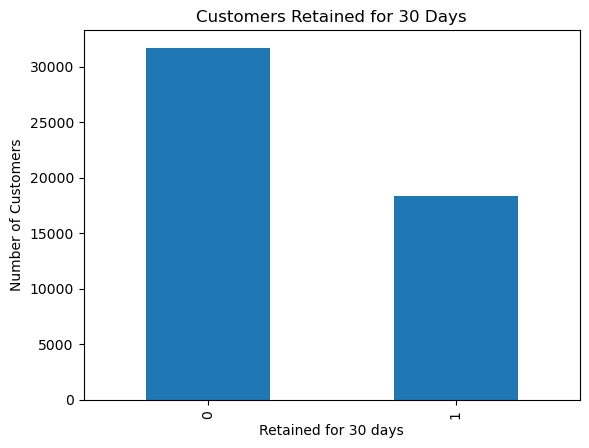

In [41]:
data.retained.value_counts().plot(kind = 'bar', xlabel = 'Retained for 30 days', ylabel = 'Number of Customers', title = 'Customers Retained for 30 Days')

In [42]:
# Determine how many customers are retained after 6 months
data['retained_180'] = np.where(data.signup_date + datetime.timedelta(days = 180)<= data.last_trip_date, 1,0)

In [43]:
data.retained_180.value_counts()

0    49915
1       85
Name: retained_180, dtype: int64

In [44]:
print('Currently the retention rate of 6 months is .17%')

Currently the retention rate of 6 months is .17%


<AxesSubplot:title={'center':'Customers Retained for 6 months'}, xlabel='Retained for 6 months', ylabel='Number of Customers'>

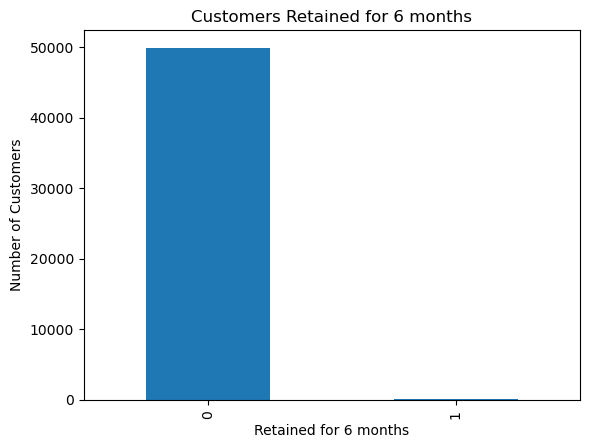

In [45]:
data.retained_180.value_counts().plot(kind = 'bar', xlabel = 'Retained for 6 months', ylabel = 'Number of Customers', title = 'Customers Retained for 6 months')

In [46]:
# Create predictive model to determine if customer will be retained for 6 months.
# Create dummy for city and phone.
dummy_city = pd.get_dummies(data.city)
dummy_phone = pd.get_dummies(data.phone)

In [47]:
data = pd.concat([data, dummy_city,dummy_phone], axis = 1)

In [48]:
finished_data = data.copy()

In [49]:
data.drop(['city', 'phone', 'last_trip_date', 'signup_date', 'retained', 'avg_driver_rating'], axis = 1, inplace = True)

In [50]:
data.head()

,trips_in_first_30_days,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_customer_rating,retained_180,Astapor,King's Landing,Winterfell,Android,iPhone
0,4,1.10,15.4,True,46.2,3.67,5.0,0,0,1,0,0,1
1,0,1.00,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0
2,3,1.00,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1
3,9,1.14,20.0,True,80.0,2.36,4.9,0,0,1,0,0,1
4,14,1.19,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0


In [51]:
#data.last_trip_date = pd.to_numeric(data.last_trip_date)

In [52]:
data.head()

,trips_in_first_30_days,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_customer_rating,retained_180,Astapor,King's Landing,Winterfell,Android,iPhone
0,4,1.10,15.4,True,46.2,3.67,5.0,0,0,1,0,0,1
1,0,1.00,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0
2,3,1.00,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1
3,9,1.14,20.0,True,80.0,2.36,4.9,0,0,1,0,0,1
4,14,1.19,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0


In [53]:
y = data.retained_180.copy()

In [54]:
X = data.drop(columns = 'retained_180')

In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = .2)

In [57]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40000, 12) (10000, 12) (40000,) (10000,)


In [58]:
np.unique(y_train, return_counts = True)

(array([0, 1]), array([39933,    67], dtype=int64))

In [59]:
# Due to imbalance of data, will be using SMOTE to balance it.
from imblearn.over_sampling import SMOTE

In [60]:
sm = SMOTE(random_state = 43)

In [61]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [62]:
np.unique(y_train_sm, return_counts = True)

(array([0, 1]), array([39933, 39933], dtype=int64))

In [63]:
# Modeling We will model with a few ML algortihms to determine best model


In [64]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train_sm, y_train_sm)


LogisticRegression()

In [65]:
pred = lg.predict(X_test)

In [66]:
print("Model accuracy(in %):", accuracy_score(y_test, pred)*100)

Model accuracy(in %): 59.4


In [67]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74      9982
           1       0.00      0.78      0.01        18

    accuracy                           0.59     10000
   macro avg       0.50      0.69      0.38     10000
weighted avg       1.00      0.59      0.74     10000



In [68]:
print(confusion_matrix(y_test, pred))

[[5926 4056]
 [   4   14]]


In [69]:
best_features = lg.coef_

In [70]:
best_features

array([[ 0.04737686, -0.28140129,  0.33913774,  0.07587016,  0.21175046,
        -0.50509581, -0.03423384, -0.57708712,  0.4081615 ,  0.21535779,
        -0.22751247,  0.22751247]])

<AxesSubplot:ylabel='Feature'>

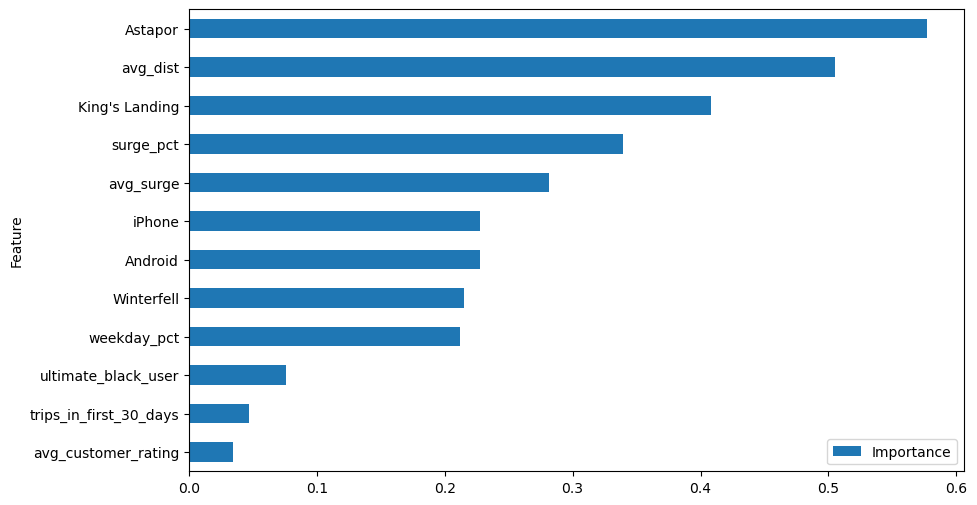

In [71]:
coefficients = lg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [72]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

In [73]:
knn_model.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(n_neighbors=3)

In [74]:
knn_pred = knn_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [75]:
print("Model accuracy(in %):", accuracy_score(y_test, knn_pred)*100)

Model accuracy(in %): 97.72999999999999


In [76]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9982
           1       0.00      0.06      0.01        18

    accuracy                           0.98     10000
   macro avg       0.50      0.52      0.50     10000
weighted avg       1.00      0.98      0.99     10000



In [77]:
print(confusion_matrix(y_test, knn_pred))

[[9772  210]
 [  17    1]]


In [78]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [79]:
dtree_model = dtree.fit(X_train_sm, y_train_sm)

In [80]:
dtree_pred = dtree_model.predict(X_test)

In [81]:
print("Model accuracy(in %):", accuracy_score(y_test, dtree_pred)*100)

Model accuracy(in %): 99.11999999999999


In [82]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      9982
           1       0.01      0.06      0.02        18

    accuracy                           0.99     10000
   macro avg       0.51      0.52      0.51     10000
weighted avg       1.00      0.99      0.99     10000



In [83]:
print(confusion_matrix(y_test, dtree_pred))

[[9911   71]
 [  17    1]]


<AxesSubplot:ylabel='Feature'>

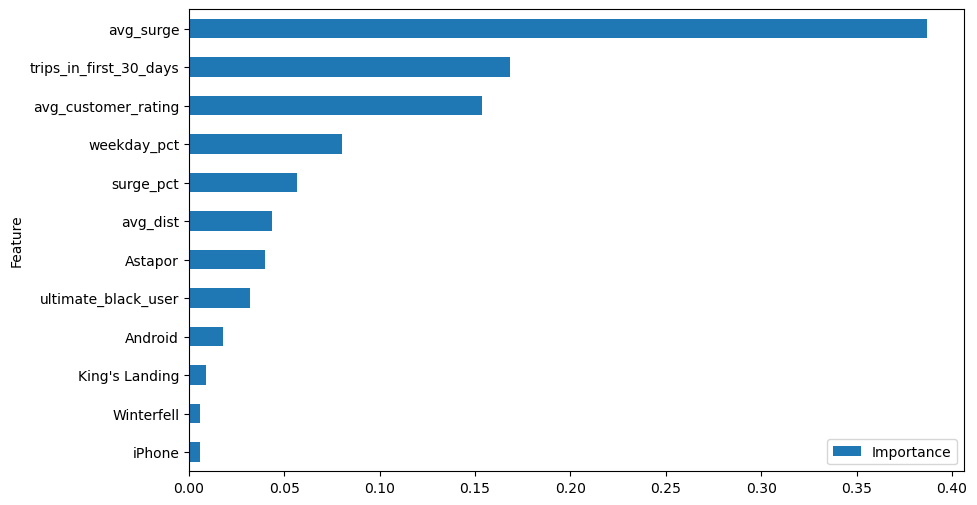

In [84]:
coefficients = dtree_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [85]:
 # Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
random_f= RandomForestClassifier(n_estimators = 100)

In [86]:
rtree_model = random_f.fit(X_train_sm, y_train_sm)

In [87]:
rtree_pred = rtree_model.predict(X_test)

In [88]:
print("Model accuracy(in %):", accuracy_score(y_test, rtree_pred)*100)

Model accuracy(in %): 99.47


In [89]:
print(classification_report(y_test, rtree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9982
           1       0.00      0.00      0.00        18

    accuracy                           0.99     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      0.99      1.00     10000



In [90]:
print(confusion_matrix(y_test, rtree_pred))

[[9947   35]
 [  18    0]]


<AxesSubplot:ylabel='Feature'>

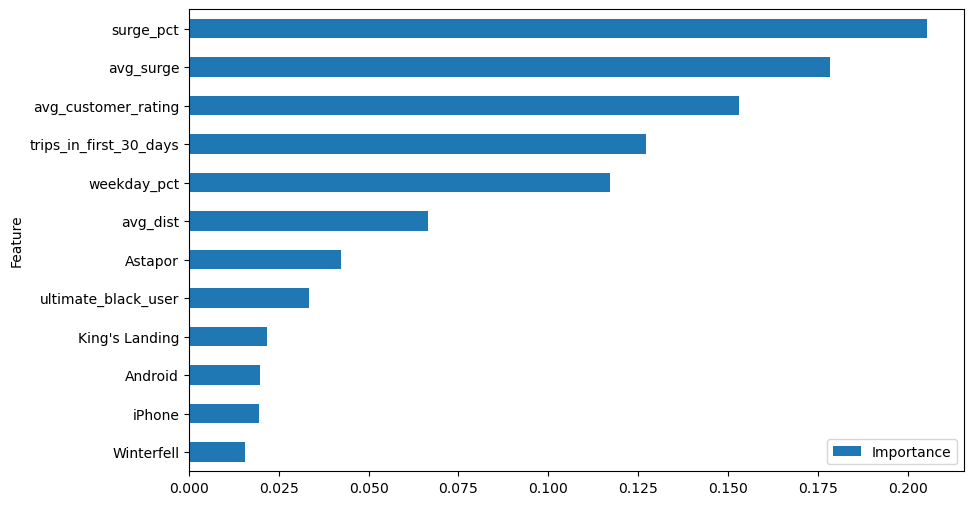

In [91]:
coefficients = random_f.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [92]:
# Logistic Regression was the most accurate in terms of getting highest on 6 months customers.
# Going to see if I can improve the model.

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

lg = LogisticRegression()
lg.fit(X_train_sm, y_train_sm)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.998300 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [94]:
lg_grid = LogisticRegression(penalty =  'l2', C = 1, solver = 'lbfgs')
lg_grid.fit(X_train_sm, y_train_sm)




LogisticRegression(C=1)

In [95]:
lg_grid_pred = lg_grid.predict(X_test)

In [96]:
print("Model accuracy(in %):", accuracy_score(y_test, lg_grid_pred)*100)

Model accuracy(in %): 59.4


In [97]:
print(classification_report(y_test, lg_grid_pred))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74      9982
           1       0.00      0.78      0.01        18

    accuracy                           0.59     10000
   macro avg       0.50      0.69      0.38     10000
weighted avg       1.00      0.59      0.74     10000



In [98]:
print(confusion_matrix(y_test, lg_grid_pred))

[[5926 4056]
 [   4   14]]


<AxesSubplot:ylabel='Feature'>

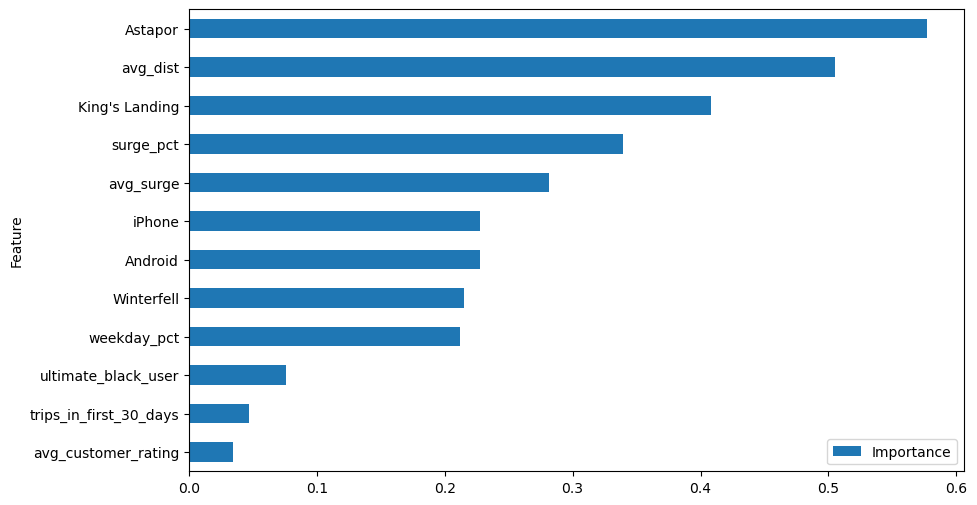

In [99]:
coefficients = lg_grid.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [101]:

finished_data.drop(['city', 'phone'], axis = 1, inplace = True)
finished_data.head()

,trips_in_first_30_days,signup_date,avg_driver_rating,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_customer_rating,retained,retained_180,Astapor,King's Landing,Winterfell,Android,iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,0,0,1,1,0


In [102]:
grouped = finished_data.groupby('retained_180')


In [120]:
grouped.head()

,trips_in_first_30_days,signup_date,avg_driver_rating,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_customer_rating,retained,retained_180,Astapor,King's Landing,Winterfell,Android,iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,0,0,1,1,0
1614,4,2014-01-01,4.9,1.02,2014-06-30,5.3,False,72.0,1.65,4.8,1,1,0,0,1,0,1
1636,2,2014-01-01,5.0,1.09,2014-07-01,7.1,False,71.4,3.14,4.7,1,1,0,0,1,1,0
1745,3,2014-01-01,4.8,1.00,2014-06-30,0.0,True,100.0,4.77,5.0,1,1,0,0,1,0,1
2226,4,2014-01-01,5.0,1.12,2014-06-30,20.5,False,51.3,1.89,4.8,1,1,0,1,0,0,1
2902,1,2014-01-01,5.0,1.10,2014-06-30,17.9,True,82.1,2.64,4.7,1,1,0,0,1,0,1


In [122]:
grouped.avg_dist.describe()

,count,mean,std,min,25%,50%,75%,max
retained_180,,,,,,,,
0,49915.0,5.799110,5.709566,0.00,2.42,3.88,6.95,160.96
1,85.0,4.455882,4.018749,1.41,2.37,3.17,4.77,21.97


In [118]:
grouped.Astapor.sum()

retained_180
0    16525.0
1        9.0
Name: Astapor, dtype: float64

In [117]:
grouped["King's Landing"].sum()

retained_180
0    10096.0
1       34.0
Name: King's Landing, dtype: float64

In [116]:
grouped.Winterfell.sum()

retained_180
0    23294.0
1       42.0
Name: Winterfell, dtype: float64

In [108]:
grouped.surge_pct.describe()

,count,mean,std,min,25%,50%,75%,max
retained_180,,,,,,,,
0,49915.0,8.846661,19.967368,0.0,0.0,0.0,8.5,100.0
1,85.0,10.537647,14.042876,0.0,0.0,6.8,16.7,100.0


In [126]:
grouped.trips_in_first_30_days.mean()

retained_180
0    2.275629
1    3.788235
Name: trips_in_first_30_days, dtype: float64